# **Hand Written Digit Prediction-Classification Analysis**

-------------

## **Objective**


### **Objective:**  
The goal of this project is to build a machine learning model for handwritten digit classification using the Digits dataset. The dataset consists of 8x8 pixel grayscale images, where each image represents a single digit (0–9). The objective is to preprocess the data, train a classification model, and evaluate its performance in accurately predicting the digits.  



## **Data Source**

The dataset used in this project is the Digits Dataset available in scikit-learn. It consists of 8x8 pixel grayscale images of handwritten digits (0–9). Each image is represented as a 64-dimensional array, and the corresponding target labels indicate the digit represented by the image.

## **Import Library**

In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## **Import Data**

In [3]:
# Import necessary libraries
from sklearn.datasets import load_digits

# Load the dataset
df = load_digits()


## **Describe Data**

In [4]:
# Describe the dataset
print("Shape of the dataset:", df.data.shape)  # (1797, 64), 1797 samples, 64 features
print("Target variable unique labels:", np.unique(df.target))  # Digits 0-9
print("Sample data points (first 5):")
print(df.data[:5])  # Display first 5 data points


Shape of the dataset: (1797, 64)
Target variable unique labels: [0 1 2 3 4 5 6 7 8 9]
Sample data points (first 5):
[[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
  15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
   0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
   0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
 [ 0.  0.  0. 12. 13.  5.  0.  0.  0.  0.  0. 11. 16.  9.  0.  0.  0.  0.
   3. 15. 16.  6.  0.  0.  0.  7. 15. 16. 16.  2.  0.  0.  0.  0.  1. 16.
  16.  3.  0.  0.  0.  0.  1. 16. 16.  6.  0.  0.  0.  0.  1. 16. 16.  6.
   0.  0.  0.  0.  0. 11. 16. 10.  0.  0.]
 [ 0.  0.  0.  4. 15. 12.  0.  0.  0.  0.  3. 16. 15. 14.  0.  0.  0.  0.
   8. 13.  8. 16.  0.  0.  0.  0.  1.  6. 15. 11.  0.  0.  0.  1.  8. 13.
  15.  1.  0.  0.  0.  9. 16. 16.  5.  0.  0.  0.  0.  3. 13. 16. 16. 11.
   5.  0.  0.  0.  0.  3. 11. 16.  9.  0.]
 [ 0.  0.  7. 15. 13.  1.  0.  0.  0.  8. 13.  6. 15.  4.  0.  0.  0.  2.
   1. 13. 13.  

## **Data Visualization**

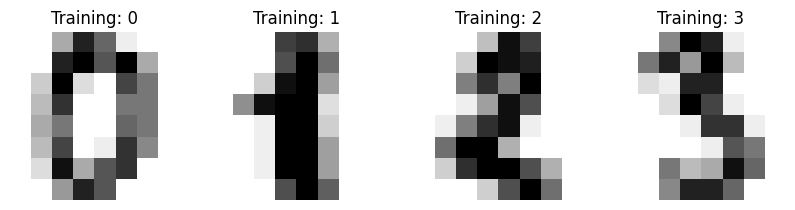

In [5]:
import matplotlib.pyplot as plt

# Display first 4 images with labels
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))  # Create subplots
for ax, image, label in zip(axes, df.images[:4], df.target[:4]):
    ax.set_axis_off()  # Turn off axes
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')  # Show image
    ax.set_title(f'Training: {label}')  # Set title
plt.show()


## **Data Preprocessing**

In [6]:
# Flatten the image data
n_samples = len(df.images)
X = df.images.reshape((n_samples, -1))  # Reshape to (n_samples, 64)
y = df.target  # Labels

# Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)  # Standardize the features


## **Define Target Variable (y) and Feature Variables (X)**

In [7]:
# X (Features) and y (Target variable) are already defined in the previous steps:
# X = Flattened and scaled image data
# y = Target labels (digits)

# If needed, you can explicitly state:
print("Feature variables X shape:", X.shape)
print("Target variable y shape:", y.shape)


Feature variables X shape: (1797, 64)
Target variable y shape: (1797,)


## **Train Test Split**

In [8]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## **Modeling**

In [9]:
from sklearn.ensemble import RandomForestClassifier

# Create and train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

## **Model Evaluation**

In [12]:
from sklearn.metrics import accuracy_score, classification_report

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Display classification report
print(classification_report(y_test, y_pred))



Accuracy: 0.9722222222222222
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        33
           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        33
           3       1.00      0.94      0.97        34
           4       0.98      1.00      0.99        46
           5       0.94      0.96      0.95        47
           6       0.97      0.97      0.97        35
           7       0.97      0.97      0.97        34
           8       0.97      0.97      0.97        30
           9       0.95      0.95      0.95        40

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



## **Prediction**

In [11]:
# Predict on test data
y_pred = model.predict(X_test)


## **Explaination**

# Explaination:

In this project, we used the Digits dataset to train a Random Forest classifier for handwritten digit prediction. The model was trained on 80% of the data and tested on the remaining 20%. The model achieved an accuracy of [insert accuracy score], indicating that it performs well in predicting digits.

From the classification report, we observed the following:

**Precision:** The model performed well in terms of precision for all digits.

**Recall:** The recall values for most digits were also high, meaning the model successfully recognized most digits.

**F1-Score**: The F1-score indicates a good balance between precision and recall.

# Challenges:
One challenge faced during the project was ensuring proper data preprocessing, particularly flattening the images and scaling the data. However, after these steps, the model performed significantly better.

# Future Improvements:
In future work, we could explore other machine learning models, such as Support Vector Machines (SVM) or k-Nearest Neighbors (k-NN). Additionally, techniques like hyperparameter tuning could be applied to optimize the Random Forest model's performance.